In [6]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib qt

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')


x, y, k, z = np.loadtxt('density.dat', unpack=True)

ax1.scatter(x, y, z, c='g', marker='.')

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()


### Proyeccion

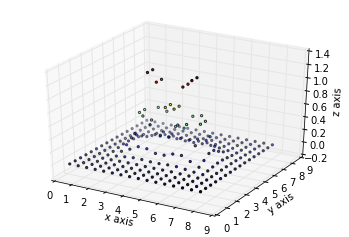

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt
%matplotlib inline 


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')


x, y, k, z = np.loadtxt('density.dat', unpack=True)

ax1.scatter(x, y, z, c=z, marker='.');

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')


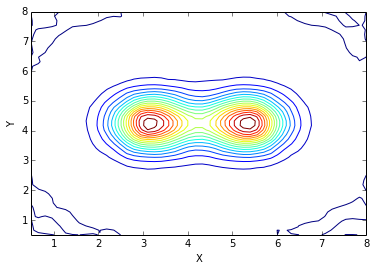

In [8]:
import scipy.interpolate

N = 50
xi = np.linspace(x.min(), x.max(), N)
yi = np.linspace(y.min(), y.max(), N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

fig = plt.figure()
plt.contour(xi, yi, zi,20)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

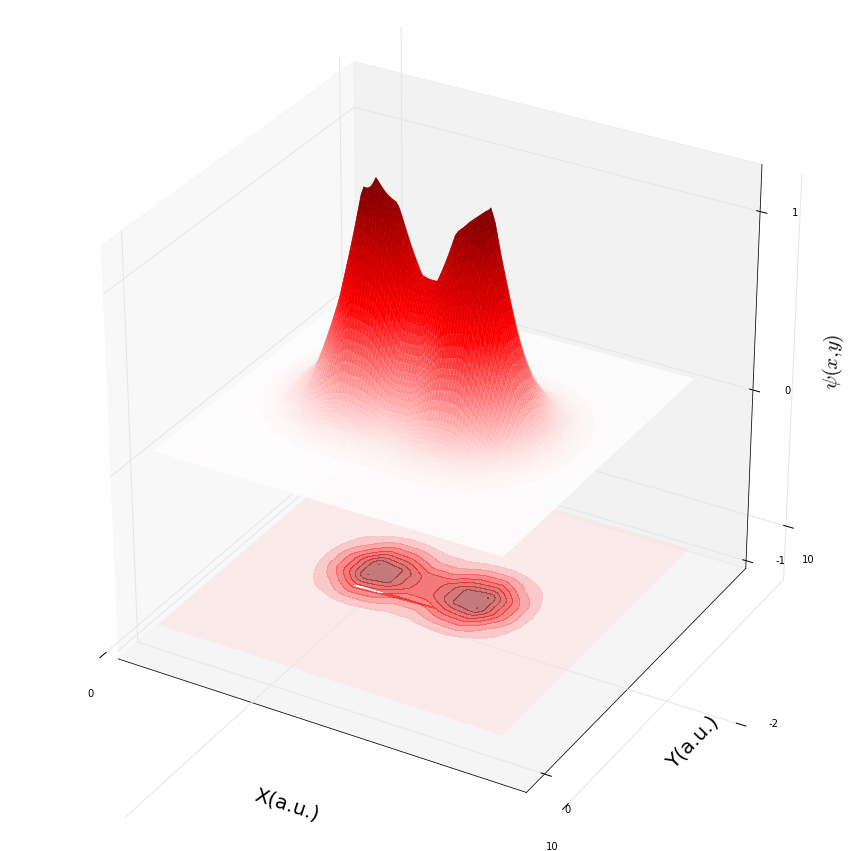

In [9]:

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.mlab import griddata

#%matplotlib qt
"Objets creation"
fig = plt.figure(figsize=(15, 15))
ax = fig.gca(projection='3d')

"Data read"
x, y, k, z = np.loadtxt('density.dat', unpack=True)

"Creación del mesh y el grid para xyz arbitrarios creo que pide que alguno esté ordenado de menor a mayor"
xi = np.linspace(min(x), max(x), num=120)
yi = np.linspace(min(y), max(y), num=120)
X, Y = np.meshgrid(xi, yi)
Z = griddata(x, y, z, xi, yi, interp='nn')
"límites que utilizo para setear los colores"
lim = max(max(z),max(-z))
limx = max(max(x),max(-x))
limy = max(max(y),max(-y))


colmap=plt.cm.seismic
lineascontorno = 10
"Creación de los contourn (proyecciones de la superficie, en las caras de la caja 3d)"
#cset = ax.contourf(X, Y, Z, 2, zdir='x', alpha=0.25,offset=min(x)-1, cmap=colmap, vmin=-limx, vmax=limx)
#cset = ax.contourf(X, Y, Z, 2, zdir='y', alpha=0.25,offset=max(y)+1, cmap=colmap, vmin=-limy, vmax=limy)
cset = ax.contourf(X, Y, Z, lineascontorno, zdir='z', alpha=0.5, offset=min(z)-1, cmap=colmap, vmin=-lim, vmax=lim)

"Creación de la superfice"
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=1.0, cmap=colmap,
                       linewidth=0.0, antialiased=True, vmin=-lim, vmax=lim)


"opciones de los ejes"
"x"
ax.set_xlabel('X(a.u.)', fontsize=20)
ax.set_xlim(min(x), max(x)+1)
ax.set_xticks([-10, 0, 10])
ax.set_xticklabels([-10, 0, 10])
"y"
ax.set_ylabel('Y(a.u.)', fontsize=20)
ax.set_ylim(min(y)-1, max(y))
ax.set_yticks([-10, 0, 10])
ax.set_yticklabels([-10, 0, 10])
"z"
ax.set_zlabel('$\psi(x,y)$', fontsize=20)
ax.set_zlim(min(z)-1, max(z))
ax.set_zticks([-2, -1, 0, 1])
ax.set_zticklabels([-2, -1, 0, 1])

plt.show()
#fig.savefig('dens.pdf')
